d:\miniconda\mnconda\envs\gluon\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
d:\miniconda\mnconda\envs\gluon\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


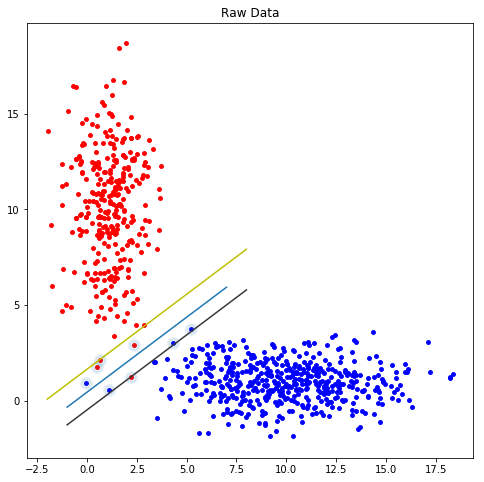

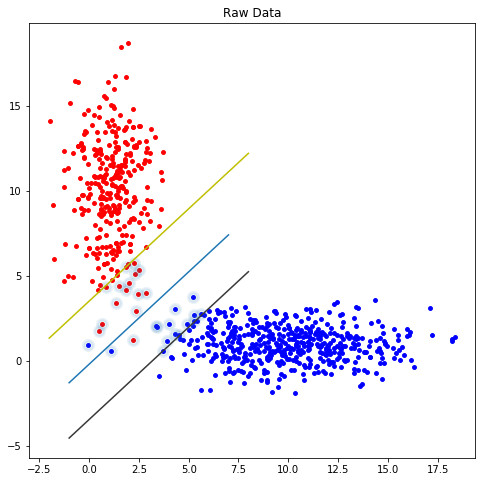

In [2]:
%matplotlib inline
from svmutil import *
import time
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
sys.path.append("..")
from matplotlib import pyplot as plt
import time
#import tools.readimg as tl
import math
from numpy import matlib




#生成两类线性可分的二维正态分布样本，用来训练二类线性SVM，画出决策面和管道，并标出支持向量
#生成两类正态样本
fp=open('x2-non.txt', 'rb')
x2=fp.read()
fp.close()
x2=(np.fromstring(x2))
x2=x2.reshape(2,int(x2.shape[0]/2))

fp=open('x1-non.txt', 'rb')
x1=fp.read()
fp.close()
x1=(np.fromstring(x1))
x1=x1.reshape(2,int(x1.shape[0]/2))

    
# 原始数据散点图
def draw(xx3,x2):
    plt.scatter(xx3[:, 0],xx3[:, 1], s=5, c='r')
    plt.scatter(x2[:, 0],x2[:, 1], s=5, c='b')
    plt.title('Raw Data')
    plt.show()

# 原始数据散点图
def draw2(xx3,x2,w,b,b11,b22,sv):
    plt.figure(figsize=(8,8))
    plt.scatter(xx3[:, 0],xx3[:, 1], s=15, c='r')
    plt.scatter(x2[:, 0],x2[:, 1], s=15, c='b')
    plt.scatter(sv[:, 0],sv[:, 1], s=100, alpha=0.1,linewidths=[3],edgecolors='face',marker='o')
    x = np.linspace(-1, 7,8)
    y = (-((w[0])[0])*x-b[0])/((w[0])[1])
    xx = np.linspace(-2, 8,10)
    yy = (-((w[0])[0])*xx-(b11))/((w[0])[1])
    xxx = np.linspace(-1, 8,9)
    yyy = (-((w[0])[0])*xxx-(b22))/((w[0])[1])
    plt.plot(x,y)
    plt.plot(xx,yy,c='y')
    plt.plot(xxx,yyy,c='200')
    plt.title('Raw Data')
    plt.show()
    
#draw(x1.T,x2.T)


##  C=1 的模型
y,x=svm_read_problem('test-non.txt')
m=svm_train(y,x,'-t 0 -c 1')
xs=m.get_SV()
a=m.get_sv_coef()
w=np.zeros((1,2))
for i,t in zip(xs,a):
    w=w+t[0]*np.array([i[1],i[2]])
w=np.array(w)    
#print(w)    

num=0;
sumb=0
sv=[]
for i,t in zip(xs,a):
    num+=1
    if t[0] <0:
        sv.append([i[1],i[2]])
        sumb+=-(1-(-1*np.dot([i[1],i[2]],w.T)))
    if t[0] >0:
        sv.append([i[1],i[2]])
        sumb+=(1-(np.dot([i[1],i[2]],w.T)))  

b=sumb/num        

sumb11=0
sumb22=0
for i,t in zip(xs,a):
        sumb1f=-np.dot([i[1],i[2]],w.T)
        if sumb11>sumb1f:
            sumb11=sumb1f  
        if sumb22<sumb1f:
            sumb22=sumb1f

sv=np.array(sv).T
draw2(x1.T,x2.T,w,b,sumb11[0],sumb22[0],sv.T)


##  C=0.010 的模型
yc,xc=svm_read_problem('test-non.txt')
mc=svm_train(yc,xc,'-t 0 -c 0.01')
xcs=mc.get_SV()
ac=mc.get_sv_coef()
wc=np.zeros((1,2))
for i,t in zip(xcs,ac):
    wc=wc+t[0]*np.array([i[1],i[2]])
wc=np.array(wc)    
#print(w)    

numc=0;
sumbc=0
svc=[]
for i,t in zip(xcs,ac):
    numc+=1
    if t[0] <0:
        svc.append([i[1],i[2]])
        sumbc+=-(1-(-1*np.dot([i[1],i[2]],wc.T)))
    if t[0] >0:
        svc.append([i[1],i[2]])
        sumbc+=(1-(np.dot([i[1],i[2]],wc.T)))  

bc=sumbc/numc        

sumb11c=0
sumb22c=0
for i,t in zip(xcs,ac):
        sumb1fc=-np.dot([i[1],i[2]],wc.T)
        if sumb11c>sumb1fc:
            sumb11c=sumb1fc  
        if sumb22c<sumb1fc:
            sumb22c=sumb1fc

svc=np.array(svc).T
draw2(x1.T,x2.T,wc,bc,sumb11c[0],sumb22c[0],svc.T)


In [26]:
#help(svm_train)